<center><H1>Molecular Similarity</H1></center>

## Objectives

<div class="alert alert-block alert-info">
<Strong>Objectives</strong>

- Evaluate structural similarity between molecules using different molecular fingerpints and similarity metrics.
- Evaluate cutoff values for molecular similarity based on distribution of similarity scores for a given fingerprint

Many useful documents/papers describe various aspects of molecular similarity, including molecular fingerprints and similarity measures.  Please read these if you need more details.

- Getting Started with the RDKit in Python<br>
(https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity)

- Fingerprint Generation, GraphSim Toolkit 2.4.2<br>
(https://docs.eyesopen.com/toolkits/python/graphsimtk/fingerprint.html)

- Chemical Fingerprints<br>
(https://docs.chemaxon.com/display/docs/Chemical+Fingerprints)

- Extended-Connectivity Fingerprints<br>
(https://doi.org/10.1021/ci100050t)

- Why is Tanimoto index an appropriate choice for fingerprint-based similarity calculations?<br>
(https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0069-3)



## 1. Computation of similarity scores

The "similar structure, similar function" is a powerful guiding force in medicinal chemistry. Structure-activity relationship studies allow chemists to We will start out comparing morphine to codeine and amlodipine. Morphine and codeine act at &mu; opioid receptors to cause analgesia. Amlodipine is a calcium channel blocker that reduces blood pressure. If the similar structure, similar funciton principle applies to these molecules, morphine and codeine should be structurally similar and different from amlodipine.

In [1]:
import requests
import time

In [2]:
# we will get SMILES from pubchem using the pubchem compound ID number
cids = [    5288826,  # morphine
            5284371,  # codeine
            2162]     # amlodipine
names=  ['morphine','codeine','amlodipine'] #for easy display of names with structures later

Let's get the SMILES strings from PubChem, generate Mol objects from them, and draw their chemical structures.

In [3]:
# this code requests all smiles in one PUG REST API request
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid = ",".join([ str(x) for x in cids])

url = prolog + "/compound/cid/" + str_cid + "/property/isomericsmiles/txt"
res = requests.get(url)  # the request will return all three smiles in one line
smiles = res.text.split() # split the data into a new list corresponding to morphine, codeine and fentanyl 
print(smiles)

['CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O', 'CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C@H]3[C@H](C=C4)O', 'CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)COCCN']


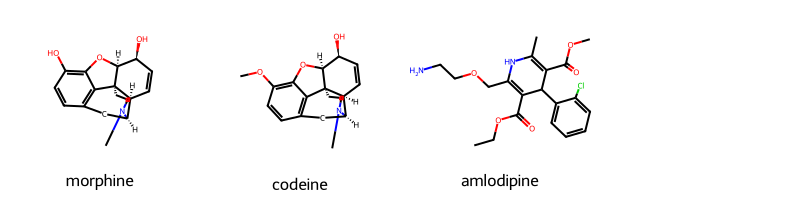

In [4]:
#display the structures with names in legends
from rdkit import Chem
from rdkit.Chem import Draw

mols = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in names] )

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* On quick inspection how are morphine and codeine structurally different?
* On quick inspection how different are morphine and amlodipine structurally?
* Would you expect morphine and amlodipine to bind to &mu; opioid receptors?
* Would you expect morphine to be a calcium channel blocker?

Now generate MACCS keys for each compound to generate structural keys for comparison.

In [5]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fps = [ MACCSkeys.GenMACCSKeys(x) for x in mols ]

Now let's compute the pair-wise similarity scores among them. The default calculation is Tanimoto simililarity. To make higher scores easier to find, they are indicated with the "\*" character(s). The more "\*" you see, the higher the similarity score.

In [6]:
for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :
        
        score = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        print(names[i], "vs.", names[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

morphine vs. codeine : 0.94 ****
morphine vs. amlodipine : 0.351 
codeine vs. amlodipine : 0.364 


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

In the code cell below, using similarity scoring determine if you would expect felodipinum (CID = 3333) to be an opioid analgesic or a calcium channel blocker.


morphine vs. felodipinim : 0.275 
morphine vs. amlodipine : 0.351 
felodipinim vs. amlodipine : 0.714 **


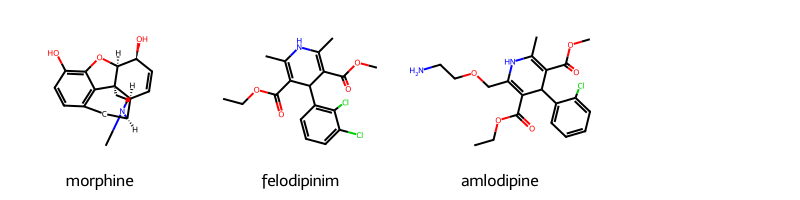

In [7]:
# write your code to compare similarity here

# we will get SMILES from pubchem using the pubchem compound ID number
cids2 = [    5288826,  # morphine
            3333,    # Felodipinum
            2162]     # amlodipine
names2=  ['morphine','felodipinim','amlodipine'] #for easy display of names with structures later

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid2 = ",".join([ str(x) for x in cids2])

url = prolog + "/compound/cid/" + str_cid2 + "/property/isomericsmiles/txt"
res = requests.get(url)  # the request will return all three smiles in one line
smiles2 = res.text.split() # split the data into a new list corresponding to morphine, codeine and fentanyl 

mols2 = [ Chem.MolFromSmiles(x) for x in smiles2 ]
fps = [ MACCSkeys.GenMACCSKeys(x) for x in mols2 ]

for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :
        
        score = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        print(names2[i], "vs.", names2[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

mols = [ Chem.MolFromSmiles(x) for x in smiles2 ]
Chem.Draw.MolsToGridImage(mols2, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in names2] )

As seen in the above section, two molecules can have very similar structures and have the same biological effect. 


Let's explore a series of class of prescription drugs called *statins* that are used to lower cholesterol. They all work by inhibiting HMG-CoA reductase which is a critical enzyme in the production of cholesterol. Many of these drugs were developed be structurally similar to existing drugs but having fewer side effects or reduce drug-drug interactions. Mevastatin (CID 64715) was the first drug to be developed by never marketed. Pravastatin does not inhibit CYP-450 enzymes. 

In [8]:
import requests
import time

In [9]:
statin_cids = [    54454,  # Simvastatin (Zocor)
                   54687,  # Pravastatin (Pravachol)
                   60823,  # Atorvastatin (Lipitor)
                  446155,  # Fluvastatin (Lescol)   
                  446157,  # Rosuvastatin (Crestor)
                 5282452,  # Pitavastatin (Livalo)
                97938126 ] # Lovastatin (Altoprev)

Let's get the SMILES strings from PubChem, generate Mol objects from them, and draw their chemical structures.

In [10]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_statin_cid = ",".join([ str(x) for x in statin_cids])

url = prolog + "/compound/cid/" + str_statin_cid + "/property/isomericsmiles/txt"
res = requests.get(url)
smiles = res.text.split()

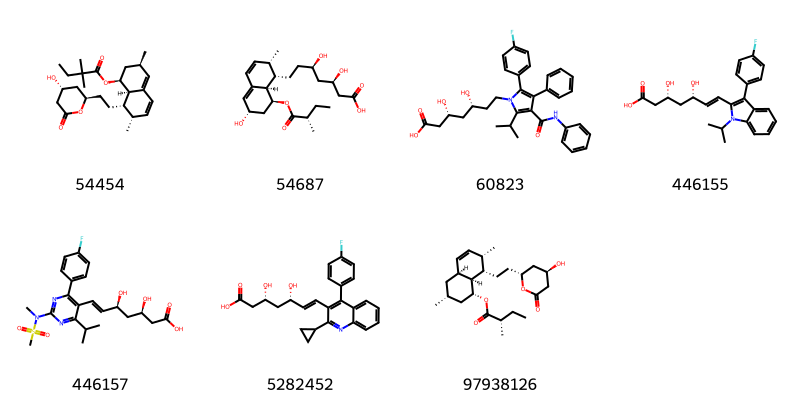

In [11]:
from rdkit import Chem
from rdkit.Chem import Draw

statins = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(statins, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in statin_cids] )

Now generate MACCS keys for each compound.

In [12]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fps = [ MACCSkeys.GenMACCSKeys(x) for x in statins ]


Now let's compute the pair-wise similarity scores among them. To make higher scores easier to find, they are indicated with the "\*" character(s).

In [13]:
for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :
        
        score = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        print(statin_cids[i], "vs.", statin_cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")


54454 vs. 54687 : 0.812 ***
54454 vs. 60823 : 0.354 
54454 vs. 446155 : 0.379 
54454 vs. 446157 : 0.307 
54454 vs. 5282452 : 0.4 
54454 vs. 97938126 : 0.867 ****
54687 vs. 60823 : 0.387 
54687 vs. 446155 : 0.397 
54687 vs. 446157 : 0.287 
54687 vs. 5282452 : 0.421 
54687 vs. 97938126 : 0.8 ***
60823 vs. 446155 : 0.662 **
60823 vs. 446157 : 0.535 
60823 vs. 5282452 : 0.507 
60823 vs. 97938126 : 0.365 
446155 vs. 446157 : 0.526 
446155 vs. 5282452 : 0.735 **
446155 vs. 97938126 : 0.393 
446157 vs. 5282452 : 0.473 
446157 vs. 97938126 : 0.298 
5282452 vs. 97938126 : 0.444 


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

- Identify the two statins above that had the highest similarity score. What structural features are similar?
- Look at the structure of 446147, what key feature sets it apart from all other statins? What molecule is it most structurally similar to?

97938126 was developed first by Merck, Sharp & Dohme in 1976 and was metabolized by 2 CYP enzymes (CYP3A and CYP2C8). 54454 was developed 10 years later at the same company and is metabolized by only one CYP enzyme (CYP3A4). <a href ="https://pmc.ncbi.nlm.nih.gov/articles/PMC7576625/" >They are *me-too* drugs defined as "a pharmacologically active compound that is structurally related to a first‐in‐class compound, regarded as belonging to the same therapeutic class as the original compound, and used for the same therapeutic purposes, but which may differ in some respects, such as specificity of pharmacological action, adverse reactions profile, or drug–drug interactions." </a>



By default, the similarity score is generated using the **Tanimoto** equation:

$\frac{|A \cap B|}{|A \cup B|}$ or  $\frac{|A \cap B|}{|A| + |B| -|A\cap B|}$ or $\frac{overlap}{|Unique A + Unique B - Overlap|}$

RDKit also supports other similarity metrics, including Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky.  The definition of these metrics is available at the LibreTexts page (https://bit.ly/2kx9NCd).

You found that 446157 was quite different from the others with a highest Tanimoto similarity of 0.535. 
The following code cell shows comparison of CIDS 60823 vs. 446157 (Atorvastatin vs Rosuvstatin) using different similary indices.

In [14]:
print("Tanimoto    :", round(DataStructs.TanimotoSimilarity(fps[2], fps[4]), 4))
print("Dice        :", round(DataStructs.DiceSimilarity(fps[2], fps[4]), 4))
print("Cosine      :", round(DataStructs.CosineSimilarity(fps[2], fps[4]), 4))
print("Sokal       :", round(DataStructs.SokalSimilarity(fps[2], fps[4]), 4))
print("McConnaughey:", round(DataStructs.McConnaugheySimilarity(fps[2], fps[4]), 4))

Tanimoto    : 0.5349
Dice        : 0.697
Cosine      : 0.6983
Sokal       : 0.3651
McConnaughey: 0.3991


By using different similarity scores, we can see that these molecules may be more or less similar depending on definition.

The Tversky score is an asymmetric similarity measure, and its computation requires the weightings (&alpha; and &beta;) of the two molecules being compared. <br> This allows for emphasizing features that are present in one set or prototype, that are not in the other. 
Setting ***&alpha; = &beta; =1*** produces the **Tanimoto Index**, while setting ***&alpha; = &beta; = 0.5*** is the same as the **Dice index**.

In the code example below we are comparing similarity using the Tversky index of CIDS 54454 vs. 54687 (Simvastatin vs Pravastatin). 

When &alpha; > &beta; we are screening to indicate that molecules must have certain features. If second molecule has extra features, that is OK, but must have key features of the first molecule.  “You must include my core structure, but you can decorate it.”

When &alpha; < &beta; we are screening to indicate that molecules must have certain features. If second molecules has extra features, that is not OK, we want the second molecule to be as close to the first molecule as possible. “Don’t stray too far from the original molecule; I want tight structural similarity.”

In [15]:
for i in range(0,11) :
    
    alpha = round( i * 0.1, 1 )
    beta = round( 1 - alpha, 1 )
    print("(alpha, beta) = (", alpha, ",", beta, ") : ", end='')
    print(round(DataStructs.TverskySimilarity( fps[2], fps[4], alpha, beta ), 4))

print()
print("When alpha and beta = 1")
alpha= 1
beta = 1
print("(alpha, beta) = (", alpha, ",", beta, ") : ", end='')
print(round(DataStructs.TverskySimilarity( fps[2], fps[4], alpha, beta ), 4), " which equals Tanimoto similarity above")
print()
print("When alpha and beta = 0.5")
alpha= 0.5
beta = 0.5
print("(alpha, beta) = (", alpha, ",", beta, ") : ", end='')
print(round(DataStructs.TverskySimilarity( fps[2], fps[4], alpha, beta ), 4), " which equals Dice similarity above")

(alpha, beta) = ( 0.0 , 1.0 ) : 0.6571
(alpha, beta) = ( 0.1 , 0.9 ) : 0.6647
(alpha, beta) = ( 0.2 , 0.8 ) : 0.6725
(alpha, beta) = ( 0.3 , 0.7 ) : 0.6805
(alpha, beta) = ( 0.4 , 0.6 ) : 0.6886
(alpha, beta) = ( 0.5 , 0.5 ) : 0.697
(alpha, beta) = ( 0.6 , 0.4 ) : 0.7055
(alpha, beta) = ( 0.7 , 0.3 ) : 0.7143
(alpha, beta) = ( 0.8 , 0.2 ) : 0.7233
(alpha, beta) = ( 0.9 , 0.1 ) : 0.7325
(alpha, beta) = ( 1.0 , 0.0 ) : 0.7419

When alpha and beta = 1
(alpha, beta) = ( 1 , 1 ) : 0.5349  which equals Tanimoto similarity above

When alpha and beta = 0.5
(alpha, beta) = ( 0.5 , 0.5 ) : 0.697  which equals Dice similarity above


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

Which values of  &alpha;  and &beta; indicate that we are penalizing features missing from the first molecule (query molecule)and extra features in the second molecule (target molecule) do not reduce similarity at all? 

Why is the similarity lowest for this series when &alpha; = 0 and &beta; = 1?

## 2. Interpretation of similarity scores

Using molecular fingeprints. we can compute the similarity scores between molecules.  However, how should these scores be interpreted?  For example, the Tanimoto score between CID 60823 and CID 446155 is computed to be 0.662, but does it mean that the two compounds are similar?  How similar is similar?  The following analysis will help answer these questions.

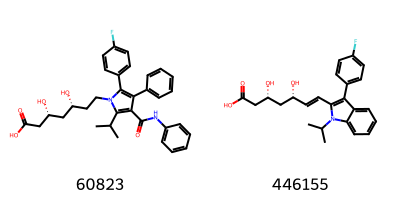

In [16]:
#run this code cell to refresh redraw these CIDs and have a mental picture of how similar they are
subset = statins[2:4]
subset_legends = [str(statin_cids[i]) for i in range(2, 4)]

Draw.MolsToGridImage(subset, molsPerRow=2, subImgSize=(200, 200), legends=subset_legends)

**Step 1.** Randomly select 1,000 compounds from PubChem and download their SMILES strings.

In [17]:
import random
random.seed(0) #choosing a random seed let's us have reproducable sequences of random numbers. When the seed is set
               #the random numbers generated will be the the same every time the code is run.

cid_max = 121413818  # The maximum CID in PubChem as of May 2025

cids = []

for x in range(1000):
    cids.append(random.randint(1, cid_max + 1))  #picks a random number between 1 and max number of CIDS

chunk_size = 100

if len(cids) % chunk_size == 0 :                    # set up chunks to request SMILES in batches of 100
    num_chunks = int( len(cids) / chunk_size )
else :
    num_chunks = int( len(cids) / chunk_size ) + 1

smiles = []
    
for i in range(num_chunks):

    if (i == 0):
        print("Processing chunk ", end='')
    
    print(i, end=' ')
    
    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)
    str_cids = ",".join([ str(x) for x in cids[idx1:idx2]])

    url = prolog + "/compound/cid/" + str_cids + "/property/isomericsmiles/txt"
    res = requests.get(url)

    if ( res.status_code == 200) :
        smiles.extend( res.text.split() )
    else :
        print("Chunk", i, "Failed to get SMILES.")
        
    time.sleep(0.2)

print("Done!")
print("# Number of SMILES : ", len(smiles))

Processing chunk 0 1 2 3 4 5 6 7 8 9 Done!
# Number of SMILES :  1000


**Step 2.** Generate the MACCSKeys for each compound.

In [18]:
from rdkit import Chem

mols = [ Chem.MolFromSmiles(x) for x in smiles if x != None ]
fps  = [ MACCSkeys.GenMACCSKeys(x) for x in mols if x != None ]
print("# Number of compounds:", len(mols))
print("# Number of fingerprints:", len(fps))

# Number of compounds: 1000
# Number of fingerprints: 1000


In [19]:
# Run this cell if the number of compounds != the number of fingerprints.
#if ( len(cids) != len(fps) ):
#    print("SMILES at index", mols.index(None), ":", smiles[ mols.index(None) ])

**Step 3.** Compute the Tanimoto scores between compounds.

In [20]:
print("# The number of compound pairs:", (len(fps) * (len(fps) - 1))/2 )

# The number of compound pairs: 499500.0


In [21]:
scores = []

for i in range(0, len(fps)) :

    if (i == 0) :
        print("Processing compound ", end='')
    
    if (i % 100 == 0) :
        print(i, end=' ')
    
    for j in range(i+1, len(fps)) :    #avoids self- and redundant comparisons
        scores.append(DataStructs.FingerprintSimilarity(fps[i], fps[j]))

print("Done!")
print("# Number of scores : ", len(scores))

Processing compound 0 100 200 300 400 500 600 700 800 900 Done!
# Number of scores :  499500


**Step 4.** Generate a histogram that shows the distribution of the pair-wise scores.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

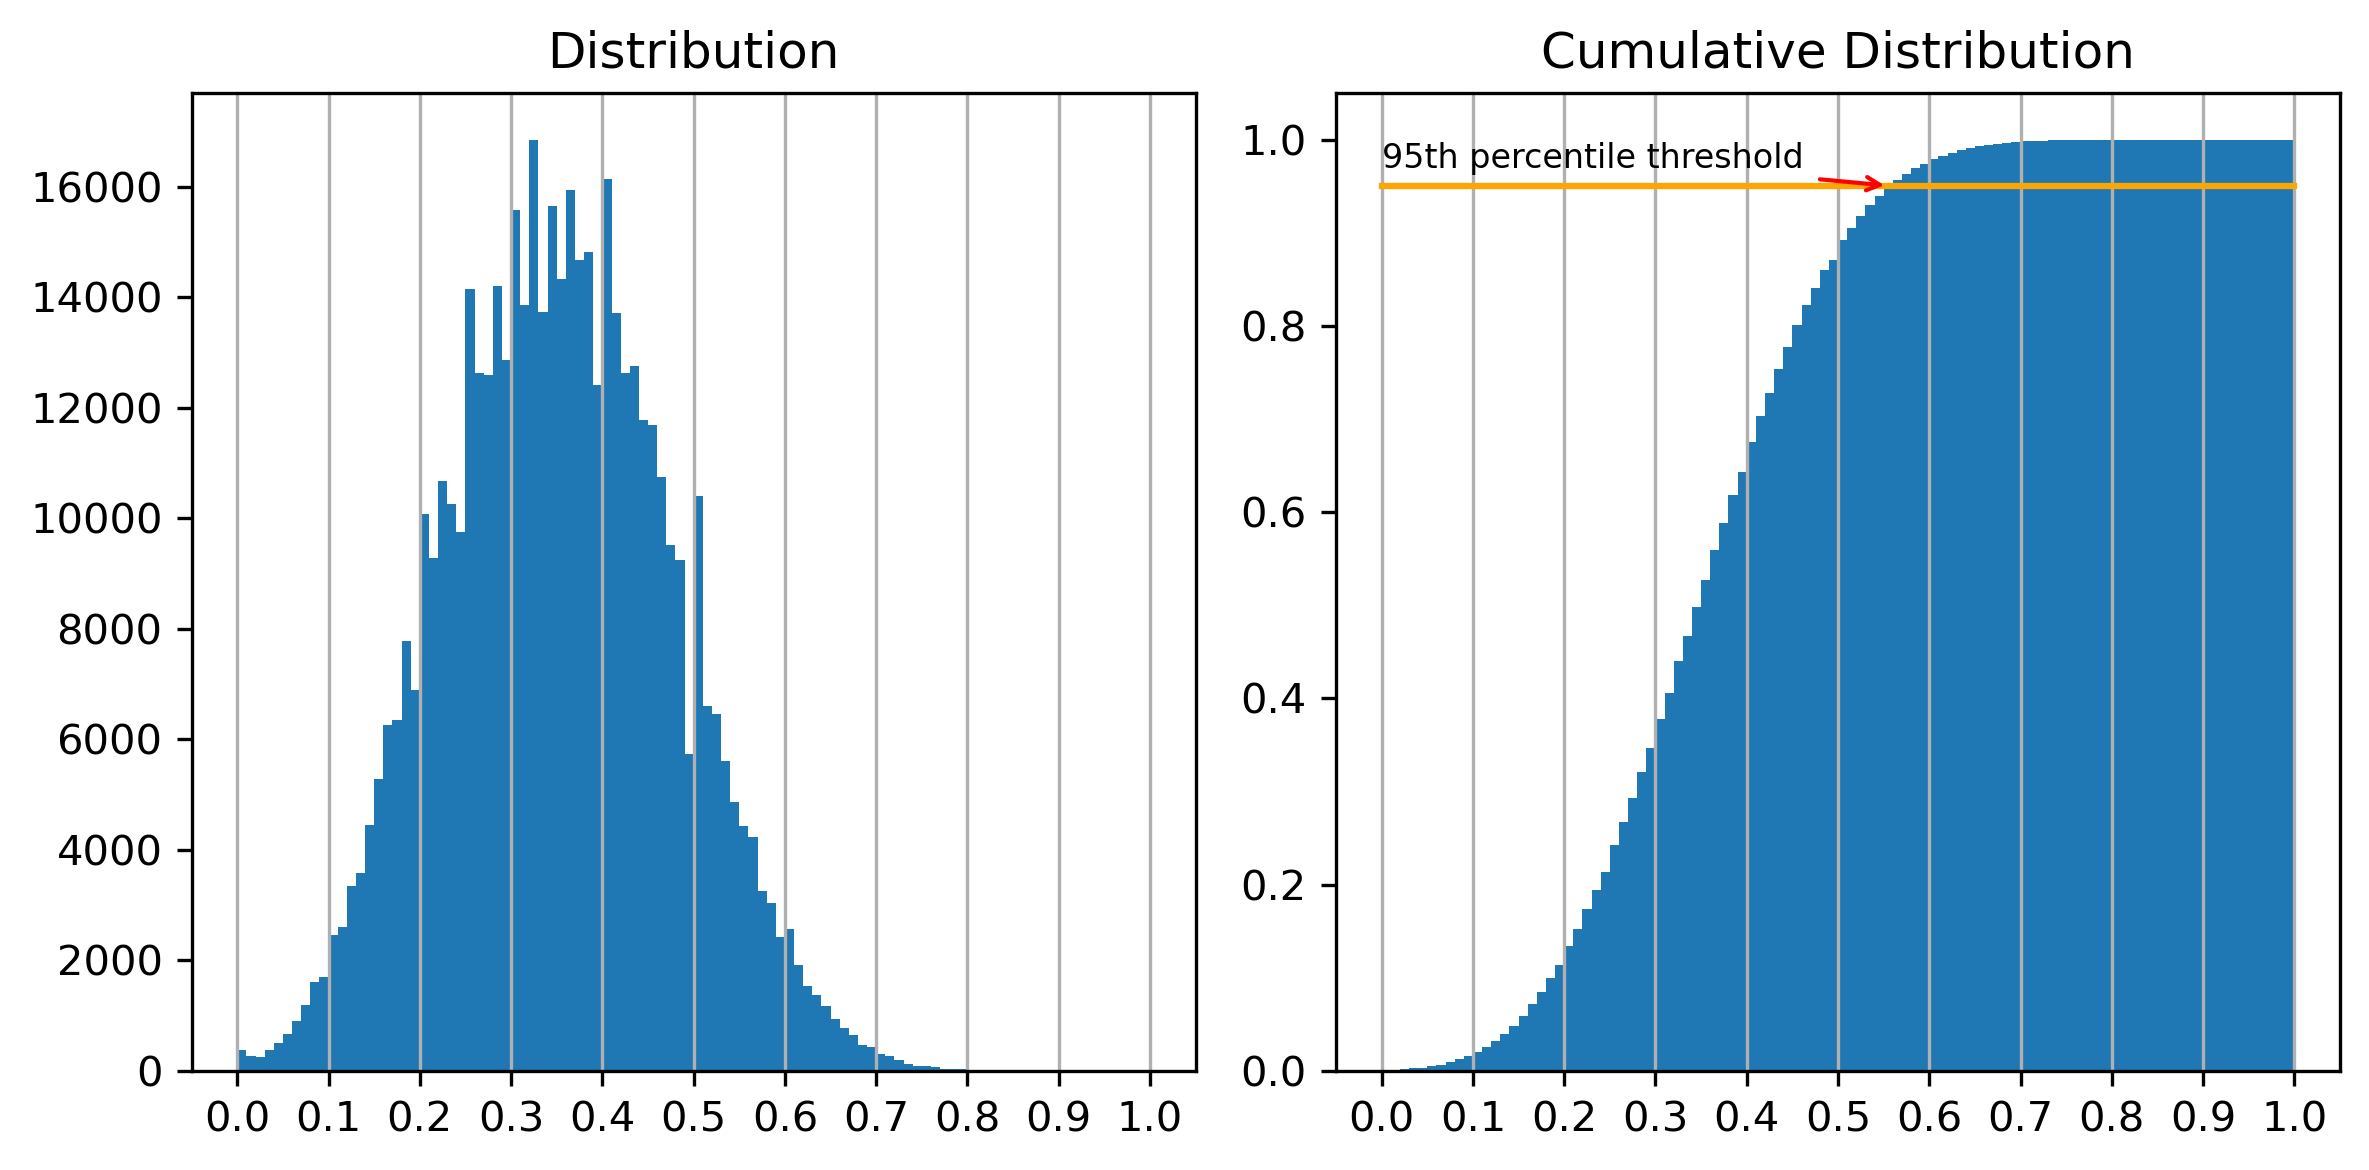

In [23]:
mybins = [ x * 0.01 for x in range(101)]

fig = plt.figure(figsize=(8,4), dpi=300)

plt.subplot(1, 2, 1)
plt.title("Distribution")
plt.hist(scores, bins=mybins)
plt.xticks([x * 0.1 for x in range(11)])
plt.grid(axis='x')

plt.subplot(1, 2, 2)
plt.title("Cumulative Distribution")
plt.hist(scores, bins=mybins, density=True, cumulative=1)
plt.plot([0,1],[0.95,0.95], linestyle='-', color='orange');
plt.xticks([x * 0.1 for x in range(11)])
plt.grid(axis='x')
plt.annotate("95th percentile threshold", 
             xy=(0.56, 0.95),            # (x, y) location of the point to annotate
             xytext=(0.0, 0.97),        # position of the label text
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=8)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

- What shape is the distribution
- What is the approximate median of all Tanimoto scores?
- What is the approximate score for the top 5% of Tanimoto scores in this distribution?

For each Tanimoto similarity threshold, we'll count how many scores are $\geq$ the threshold and calculate the percentage of scores that meet or exceed it. 

In [24]:
for i in range(21) :

    thresh = i / 20 
    num_similar_pairs = len([x for x in scores if x >= thresh]) 
    prob = num_similar_pairs / len(scores) * 100
    print("%.3f %8d (%8.4f %%)" % (thresh, num_similar_pairs, round(prob,4)))

0.000   499500 (100.0000 %)
0.050   497736 ( 99.6468 %)
0.100   491673 ( 98.4330 %)
0.150   475236 ( 95.1423 %)
0.200   442681 ( 88.6248 %)
0.250   392628 ( 78.6042 %)
0.300   326214 ( 65.3081 %)
0.350   251549 ( 50.3602 %)
0.400   178367 ( 35.7091 %)
0.450   111342 ( 22.2907 %)
0.500    64398 ( 12.8925 %)
0.550    30468 (  6.0997 %)
0.600    13094 (  2.6214 %)
0.650     4551 (  0.9111 %)
0.700     1329 (  0.2661 %)
0.750      312 (  0.0625 %)
0.800       63 (  0.0126 %)
0.850       15 (  0.0030 %)
0.900        2 (  0.0004 %)
0.950        0 (  0.0000 %)
1.000        0 (  0.0000 %)


In [25]:
import statistics
print("Average (mean):%.3f" %(statistics.mean(scores)))
print("Median        :%.3f" %(statistics.median(scores)))

Average (mean):0.352
Median        :0.351


From the distribution of the similarity scores among 1,000 compounds, we observe the following:<br>
- If you randomly select two compounds from PubChem, the similarity score between them (computed using the Tanimoto equation and MACCS keys) is ~0.35 on average.
- About %5 of randomly selected compound pairs have a similarity score greater than 0.55.
- About %1 of randomly selected compound pairs have a similarity score greater than 0.65.

If two compounds have a Tanimoto score of 0.35, it is close to the average Tanimoto score between randomly selected compounds and there is a 50% chance that you will get a score of 0.35 or greater just by selecting two compounds from PubChem.  Therefore, it is reasonable to consider the two compounds are not similar.<br>

The Tanimoto index may have a value ranging from 0 (for no similarity) to 1 (for identical molecules) and the midpoint of this value range is 0.5.  Because of this, a Tanimoto score of **0.55** may not sound great enough to consider two compounds to be similar.  However, according to the score distribution curve generated here, only **~5%** of randomly selected compound pairs will have a score greater than this.<br>

In the previous section, we computed the similarity scores between some cholesterol-lowering drugs, and CID 60823 and CID 446155 had a Tanimoto score of **0.662**.  Based on the score distribution curve generated in the second section, we can say that the probablilty of two randomly selected compounds from PubChem having a Tanimoto score greater than 0.662 is **less than 1%**.

The following code cell demonstrates how to find an appropriate similarity score threshold above which a given percentage of the compound pairs will be considered to be similar to each other.

In [26]:
scores.sort()    # Sort the scores in an increasing order.

In [27]:
# to find a threshold for top 3% compound pairs (i.e., 97% percentile)
print("# total compound pairs:   ", len(scores))
print("# 97% of compound pairs:  ", len(scores) * 0.97)
print("# score at 97% percentile:", scores[ round(len(scores) * 0.97) ] )


# total compound pairs:    499500
# 97% of compound pairs:   484515.0
# score at 97% percentile: 0.5918367346938775


 <div class="alert alert-block alert-success">
      <H1><center>Homework</center></H1>

# Homework Part 1: Interpreting Data

Turn in Part 1 as a written assignment. 

1) Run the statins molecules using extended connectivity fingerprints in the code cells below. The current code sets the ECFP equivalent radius value to 1 with 1024 bits. Compare the Tanimoto similarity values to the MACCS data found previously. Explain what happens to the similarity values.
2) Rerun this code with three different radius setting 0, 1 and 2. (You just ran radius 1 for question 1.)
- Calculate pairwise Tanimoto similarity scores for the same set of molecules at each radius setting.
- Compare how the similarity scores change as the radius increases.
- Describe any trends you observe. For example:
    - do similarity scores tend to increase or decrease as radius increases or decreases?
    - are the molecules ranked similarly or differently across radii?
- Explain why you think these changes happen. Consider what kinds of molecular features are being captured at each radius. Hint:Think about what a radius of 0, 1, or 2 means in terms of what the fingerprint is seeing. How much of the molecular neighborhood around each atom is being encoded?

In [28]:
cids = [    54454,  # Simvastatin (Zocor)              
            54687,  # Pravastatin (Pravachol)
            60823,  # Atorvastatin (Lipitor)
           446155,  # Fluvastatin (Lescol)   
           446157,  # Rosuvastatin (Crestor)
          5282452,  # Pitavastatin (Livalo)
         97938126 ] # Lovastatin (Altoprev)

In [29]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid = ",".join([ str(x) for x in cids])

url = prolog + "/compound/cid/" + str_cid + "/property/isomericsmiles/txt"
res = requests.get(url)
smiles = res.text.split()

print(smiles)

['CCC(C)(C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([C@H](C=C2)C)CC[C@@H]3C[C@H](CC(=O)O3)O)C', 'CC[C@H](C)C(=O)O[C@H]1C[C@@H](C=C2[C@H]1[C@H]([C@H](C=C2)C)CC[C@H](C[C@H](CC(=O)O)O)O)O', 'CC(C)C1=C(C(=C(N1CC[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)C3=CC=CC=C3)C(=O)NC4=CC=CC=C4', 'CC(C)N1C2=CC=CC=C2C(=C1/C=C/[C@H](C[C@H](CC(=O)O)O)O)C3=CC=C(C=C3)F', 'CC(C)C1=NC(=NC(=C1/C=C/[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)N(C)S(=O)(=O)C', 'C1CC1C2=NC3=CC=CC=C3C(=C2/C=C/[C@H](C[C@H](CC(=O)O)O)O)C4=CC=C(C=C4)F', 'CC[C@H](C)C(=O)O[C@@H]1C[C@@H](C[C@@H]2[C@H]1[C@H]([C@H](C=C2)C)CC[C@@H]3C[C@H](CC(=O)O3)O)C']


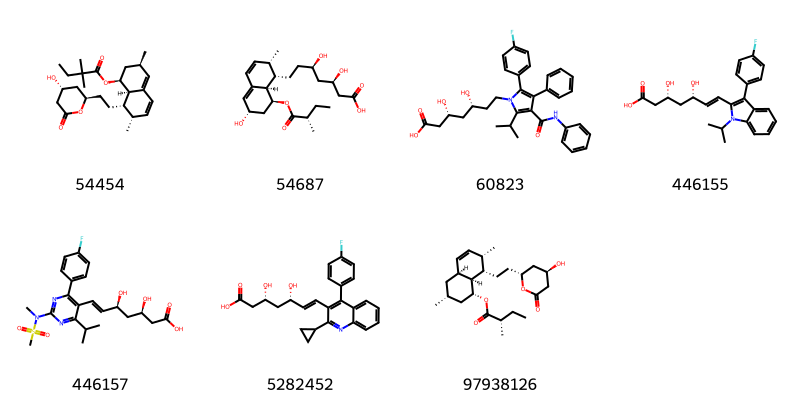

In [30]:
mols = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in cids] )

In [31]:
# Radius set to 1 and 1024 bit size
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=1,fpSize=1024)

fps = [ mfpgen.GetFingerprint(x) for x in mols ]


In [32]:
# This calculates Tanimoto similarity
for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :
        
        score = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        print(cids[i], "vs.", cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

54454 vs. 54687 : 0.48 
54454 vs. 60823 : 0.111 
54454 vs. 446155 : 0.113 
54454 vs. 446157 : 0.121 
54454 vs. 5282452 : 0.127 
54454 vs. 97938126 : 0.6 *
54687 vs. 60823 : 0.296 
54687 vs. 446155 : 0.278 
54687 vs. 446157 : 0.276 
54687 vs. 5282452 : 0.268 
54687 vs. 97938126 : 0.532 
60823 vs. 446155 : 0.548 
60823 vs. 446157 : 0.429 
60823 vs. 5282452 : 0.426 
60823 vs. 97938126 : 0.153 
446155 vs. 446157 : 0.533 
446155 vs. 5282452 : 0.61 *
446155 vs. 97938126 : 0.155 
446157 vs. 5282452 : 0.543 
446157 vs. 97938126 : 0.161 
5282452 vs. 97938126 : 0.15 


In [33]:
# Radius set to 0 and 1024 bit size
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=0,fpSize=1024)
fps0 = [ mfpgen.GetFingerprint(x) for x in mols ]


In [34]:
# This calculates Tanimoto similarity
for i in range(0, len(fps0)) :
    for j in range(i+1, len(fps0)) :
        
        score = DataStructs.TanimotoSimilarity(fps0[i], fps0[j])
        print(cids[i], "vs.", cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

54454 vs. 54687 : 0.75 ***
54454 vs. 60823 : 0.4 
54454 vs. 446155 : 0.4 
54454 vs. 446157 : 0.353 
54454 vs. 5282452 : 0.467 
54454 vs. 97938126 : 0.833 ***
54687 vs. 60823 : 0.538 
54687 vs. 446155 : 0.538 
54687 vs. 446157 : 0.467 
54687 vs. 5282452 : 0.615 *
54687 vs. 97938126 : 0.909 ****
60823 vs. 446155 : 0.818 ***
60823 vs. 446157 : 0.571 *
60823 vs. 5282452 : 0.5 
60823 vs. 97938126 : 0.5 
446155 vs. 446157 : 0.692 **
446155 vs. 5282452 : 0.615 *
446155 vs. 97938126 : 0.5 
446157 vs. 5282452 : 0.643 *
446157 vs. 97938126 : 0.438 
5282452 vs. 97938126 : 0.571 *


In [35]:
# Radius set to 2 and 1024 bit size
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)
fps2 = [ mfpgen.GetFingerprint(x) for x in mols ]


In [36]:
# This calculates Tanimoto similarity
for i in range(0, len(fps2)) :
    for j in range(i+1, len(fps2)) :
        
        score = DataStructs.TanimotoSimilarity(fps2[i], fps2[j])
        print(cids[i], "vs.", cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

54454 vs. 54687 : 0.386 
54454 vs. 60823 : 0.078 
54454 vs. 446155 : 0.081 
54454 vs. 446157 : 0.086 
54454 vs. 5282452 : 0.087 
54454 vs. 97938126 : 0.449 
54687 vs. 60823 : 0.261 
54687 vs. 446155 : 0.2 
54687 vs. 446157 : 0.198 
54687 vs. 5282452 : 0.189 
54687 vs. 97938126 : 0.373 
60823 vs. 446155 : 0.451 
60823 vs. 446157 : 0.325 
60823 vs. 5282452 : 0.367 
60823 vs. 97938126 : 0.124 
446155 vs. 446157 : 0.446 
446155 vs. 5282452 : 0.544 
446155 vs. 97938126 : 0.104 
446157 vs. 5282452 : 0.455 
446157 vs. 97938126 : 0.108 
5282452 vs. 97938126 : 0.099 


# Homework Part 2: Writing Python Code

Turn in Part 2 as a new jupyter notebook titled **MS2025_part2_homework**. You will also be turning in a lab report for **Part 2 Problem 2**. 


**Part 2 Problem 1:**  Compute the Tanimoto similarity scores between the seven statin compounds used in similarity section, using the PubChem fingerprints

- Download the PubChem Fingerprint for the seven CIDs.
- Convert the downloaded fingerprints into bit vectors.
- Compute the pair-wise Tanimoto scores using the bit vectors.
- Compare these results to the MACCS keys earlier.

In this problem, you are calculating Tanimoto similarity scores between statin molecules using two types of fingerprints: MACCS keys (166 bits) and PubChem fingerprints (881 bits).

You may have noticed that, even though the statins are structurally quite similar, MACCS keys produced slightly lower similarity scores than PubChem fingerprints.

Turn the following question in along with Part 1 as a written assignment.

Why might a fingerprint with fewer bits (MACCS) give lower similarity scores in a set of already similar molecules?


In [37]:
# Write your code in this cell

# need user defined function o decode pubchem fingerprints
from base64 import b64decode
def PCFP_BitString(pcfp_base64) :

    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring

# Need statin CIDS
statin_cids = [    54454,  # Simvastatin (Zocor)
                   54687,  # Pravastatin (Pravachol)
                   60823,  # Atorvastatin (Lipitor)
                  446155,  # Fluvastatin (Lescol)   
                  446157,  # Rosuvastatin (Crestor)
                 5282452,  # Pitavastatin (Livalo)
                97938126 ] # Lovastatin (Altoprev)

# download each pubchem fingerprint, convert to bitstring and store in a list
# Method 1 with separate requests
statin_pcfp = []
for item in statin_cids:
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/"+ str(item)+ "/property/Fingerprint2D/TXT"
    res = requests.get(url)
    text = res.text.rstrip("\n")
    pcfp_bitstring = PCFP_BitString(text)
    # use DataStructs.CreateFromBitString to convert a string to an RDKit bit vect object.
    statin_pcfp.append(DataStructs.CreateFromBitString(pcfp_bitstring))

# This calculates Tanimoto similarity of pubchem fingerprints
for i in range(0, len(statin_pcfp)) :
    for j in range(i+1, len(statin_pcfp)) :
        
        score = DataStructs.TanimotoSimilarity(statin_pcfp[i], statin_pcfp[j])
        print(statin_cids[i], "vs.", statin_cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")

# method 2 get Pubchem fingerprints in one request
# join to make one request
str_statin_cids = ",".join([ str(x) for x in statin_cids])
# generate the url
url = prolog + "/compound/cid/" + str_statin_cids + "/property/Fingerprint2D/TXT"
res = requests.get(url)

statin_pcfps_base64 = res.text.split()
statin_pcfps_bitstring = [ PCFP_BitString(x) for x in statin_pcfps_base64 ]

# use DataStructs.CreateFromBitString to convert a string to an RDKit bit vect object for calculations.
statin_pcfps_bitvect = [ DataStructs.CreateFromBitString(x) for x in statin_pcfps_bitstring ]

# This calculates Tanimoto similarity of pubchem fingerprints
#for i in range(0, len(statin_pcfps_bitvect)) :
#    for j in range(i+1, len(statin_pcfps_bitvect)) :
        
#        score = DataStructs.TanimotoSimilarity(statin_pcfps_bitvect[i], statin_pcfps_bitvect[j])
#        print(statin_cids[i], "vs.", statin_cids[j], ":", round(score,3), end='')
        
#        if ( score >= 0.85 ):
#            print(" ****")
#        elif ( score >= 0.75 ):
#            print(" ***")
#        elif ( score >= 0.65 ):
#            print(" **")
#        elif ( score >= 0.55 ):
#            print(" *")
#        else:
#            print(" ")

54454 vs. 54687 : 0.897 ****
54454 vs. 60823 : 0.392 
54454 vs. 446155 : 0.388 
54454 vs. 446157 : 0.387 
54454 vs. 5282452 : 0.424 
54454 vs. 97938126 : 0.864 ****
54687 vs. 60823 : 0.397 
54687 vs. 446155 : 0.425 
54687 vs. 446157 : 0.416 
54687 vs. 5282452 : 0.446 
54687 vs. 97938126 : 0.813 ***
60823 vs. 446155 : 0.793 ***
60823 vs. 446157 : 0.667 **
60823 vs. 5282452 : 0.74 **
60823 vs. 97938126 : 0.377 
446155 vs. 446157 : 0.722 **
446155 vs. 5282452 : 0.868 ****
446155 vs. 97938126 : 0.372 
446157 vs. 5282452 : 0.741 **
446157 vs. 97938126 : 0.372 
5282452 vs. 97938126 : 0.407 


**Part 2 Problem 2:**  

Previously, you computed the similarity scores between some cholesterol-lowering drugs, and CID 60823 and CID 446155 had a Tanimoto score of **0.662**.  Based on the score distribution curve generated in the second section, we can say that the probablilty of two randomly selected compounds from PubChem having a Tanimoto score greater than 0.662 is **less than 1%**. This was with MACCS Keys. 

In this exercise, we want to generate the distribution of the similarity scores among 1,000 compounds randomly selected from PubChem, using different molecular fingeprints and similarity metrics.

For molecular fingerprints, use the following:

- PubChem Fingerprint
- MACCS keys
- Morgan Fingerprint (ECFP4 analogue, 1024-bit-long)

For similarity metrics, use the following:

- Tanimoto similarity
- Dice similarity
- Cosine similarity

As a result, a total of 9 distribution curves need to be generated.

Here are additional instructions to follow:

- When generating the histograms, bin the scores from 0 to 1 with an increment of 0.01.
- For each distribution curve, determine the similarity score threshold so that 1% of the compound pairs have a similarity score greater than or equal to this threshold.
- Use RDKit to generate the MACCS keys and Morgan fingerprint (radius 2 and 1024 bits) and download the PubChem fingerprints from PubChem.
- For reproducibility, use random.seed(2025) before you generate random CIDs.

**Lab report:**

1) Title, Author and Date
2) Introduction
    - Brief overview of molecular similarity and its role in cheminformatics
    - Define fingerprints (PubChem, MACCS, Morgan) and similarity metrics (Tanimoto, Dice, Cosine)
    - State the goal of the experiment
3) Methods: Describe how
    - CIDS were selected
    - SMILES were retrieved
    - fingerprints were generated
    - similarity scores were calculated
4) Results
    - Similarity Score Distributions (9 Histograms)
    - Top 1% Similarity Thresholds
|Fingerprint|Tanimoto|Dice|Cosine|
|-----------|--------|---------|---------|
|PubChem|---|---|---|
|MACCS|---|---|---|
|Morgan(radius = 2)|---|---|---|


5) Discussion:
    - Which fingerprints gave higher or lower similarity scores?
    - How did similarity metrics affect score distributions?
    - Did MACCS, PubChem or Morgan fingerprints behave differently? If so, why?
    - What cut-off would you use for virtual screening to find like molecules?

6) Conclusion:
   - summarize your findings in 2-3 sentences



**Step 1:** Generate 1,000 random CIDs, download the isomeric SMILES for them, and create the RDKit mol objects from the downloaded SMILES strings.

In [38]:
# Write your code in this cell


**Step 2:** Generate the fingerprints, compute the similarity scores, determine similarity thresholds, and make histograms.

In [40]:
# Write your code in this cell (or as many new cells as needed) to complete Step 2.





# Acknowledgments